# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

Using TensorFlow backend.
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [2]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
y_all = []    


def load_metadata(path):
    metadata = []
    people_type = 0
    num = 0
    for i in sorted(os.listdir(path)):
        for f in sorted(os.listdir(os.path.join(path, i))):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
            
            y_all.append(people_type)
            print(i,y_all[num])
            num+=1
        people_type+=1
            
    return np.array(metadata)

metadata = load_metadata('20')

dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_01 0
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipei_02 1
dpp_NewTaipe

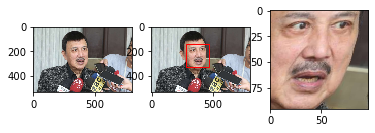

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from align import AlignDlib

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('models/landmarks.dat')

# Load an image of Jacques Chirac
jc_orig = load_image(metadata[77].image_path())

# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.subplot(131)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(jc_aligned);

In [4]:
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

embedded = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        img = align_image(img)
        img = (img / 255.).astype(np.float32)
        embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
    # scale RGB values to interval [0,1]
    # obtain embedding vector for image
    except:
        print(m.image_path())

In [5]:
int(metadata.shape[0]/5)
(metadata.shape[0]/5+0.1)%1

0.6999999999999886

In [6]:
total_test_num = int(metadata.shape[0]/5)
total_train_num = metadata.shape[0]-total_test_num
if (metadata.shape[0]/10)%1!=0:
    total_test_num = int(metadata.shape[0]/5)+1
    total_train_num = metadata.shape[0]-total_test_num+1
    
print(total_test_num)
print(total_train_num)

print(int(9/5))

100
399
1


In [7]:
total_test_num = int(metadata.shape[0]/10)
total_train_num = metadata.shape[0]-total_test_num
if (metadata.shape[0]/10)%1!=0:
    total_test_num = int(metadata.shape[0]/10)+1
    total_train_num = metadata.shape[0]-total_test_num
x_test = np.zeros((total_test_num,96,96,3))
x_train = np.zeros((total_train_num,96,96,3))


test_num=0
train_num=0
y_test = []
y_train = []

for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    img = align_image(img)
    img = (img / 255.).astype(np.float32)
    if i%5<1:
        x_test[test_num] =(np.expand_dims(img, axis=0))[0]
        y_test.append(y_all[i])
        test_num+=1
    else:
        x_train[train_num] =(np.expand_dims(img, axis=0))[0]
        y_train.append(y_all[i])
        train_num+=1

    # scale RGB values to interval [0,1]
    # obtain embedding vector for image
    print(i,m)


0 20\dpp_NewTaipei_01\1810002.jpg
1 20\dpp_NewTaipei_01\1810003.jpg
2 20\dpp_NewTaipei_01\1810004.jpg
3 20\dpp_NewTaipei_01\1810006.jpg
4 20\dpp_NewTaipei_01\1810008.jpg
5 20\dpp_NewTaipei_01\1810010.jpg
6 20\dpp_NewTaipei_01\1810011.jpg
7 20\dpp_NewTaipei_01\1810012.jpg
8 20\dpp_NewTaipei_01\1810013.jpg
9 20\dpp_NewTaipei_01\1810014.jpg
10 20\dpp_NewTaipei_01\1810015.jpg
11 20\dpp_NewTaipei_01\1810020.jpg
12 20\dpp_NewTaipei_01\1810027.jpg
13 20\dpp_NewTaipei_01\1810028.jpg
14 20\dpp_NewTaipei_01\1810031.jpg
15 20\dpp_NewTaipei_01\1810036.jpg
16 20\dpp_NewTaipei_01\1810037.jpg
17 20\dpp_NewTaipei_01\1810041.jpg
18 20\dpp_NewTaipei_01\1810046.jpg
19 20\dpp_NewTaipei_01\1810049.jpg
20 20\dpp_NewTaipei_01\1810056.jpg
21 20\dpp_NewTaipei_01\1810059.jpg
22 20\dpp_NewTaipei_01\1810061.jpg
23 20\dpp_NewTaipei_01\1810062.jpg
24 20\dpp_NewTaipei_01\1810074.jpg
25 20\dpp_NewTaipei_01\1810076.jpg
26 20\dpp_NewTaipei_02\2010042.jpg
27 20\dpp_NewTaipei_02\2010043.jpg
28 20\dpp_NewTaipei_02\2010045

231 20\kmt_NewTaipei_01\1710020.jpg
232 20\kmt_NewTaipei_01\1710022.jpg
233 20\kmt_NewTaipei_01\1710025.jpg
234 20\kmt_NewTaipei_01\1710028.jpg
235 20\kmt_NewTaipei_01\1710033.jpg
236 20\kmt_NewTaipei_01\1710035.jpg
237 20\kmt_NewTaipei_01\1710036.jpg
238 20\kmt_NewTaipei_01\1710040.jpg
239 20\kmt_NewTaipei_01\1710042.jpg
240 20\kmt_NewTaipei_01\1710043.jpg
241 20\kmt_NewTaipei_01\1710046.jpg
242 20\kmt_NewTaipei_01\1710053.jpg
243 20\kmt_NewTaipei_01\1710054.jpg
244 20\kmt_NewTaipei_01\1710058.jpg
245 20\kmt_NewTaipei_01\1710061.jpg
246 20\kmt_NewTaipei_04\2310001.jpg
247 20\kmt_NewTaipei_04\2310002.jpg
248 20\kmt_NewTaipei_04\2310006.jpg
249 20\kmt_NewTaipei_04\2310008.jpg
250 20\kmt_NewTaipei_04\2310010.jpg
251 20\kmt_NewTaipei_04\2310012.jpg
252 20\kmt_NewTaipei_04\2310016.jpg
253 20\kmt_NewTaipei_04\2310017.jpg
254 20\kmt_NewTaipei_04\2310018.jpg
255 20\kmt_NewTaipei_04\2310020.jpg
256 20\kmt_NewTaipei_04\2310022.jpg
257 20\kmt_NewTaipei_04\2310023.jpg
258 20\kmt_NewTaipei_04\2310

478 20\kmt_taipei_08\1510009.jpg
479 20\kmt_taipei_08\1510010.jpg
480 20\kmt_taipei_08\1510011.jpg
481 20\kmt_taipei_08\1510012.jpg
482 20\kmt_taipei_08\1510014.jpg
483 20\kmt_taipei_08\1510021.jpg
484 20\kmt_taipei_08\1510023.jpg
485 20\kmt_taipei_08\1510024.jpg
486 20\kmt_taipei_08\1510028.jpg
487 20\kmt_taipei_08\1510029.jpg
488 20\kmt_taipei_08\1510031.jpg
489 20\kmt_taipei_08\1510033.jpg
490 20\kmt_taipei_08\1510034.jpg
491 20\kmt_taipei_08\1510040.jpg
492 20\kmt_taipei_08\1510045.jpg
493 20\kmt_taipei_08\1510048.jpg
494 20\kmt_taipei_08\1510052.jpg
495 20\kmt_taipei_08\1510057.jpg
496 20\kmt_taipei_08\1510059.jpg
497 20\kmt_taipei_08\1510061.jpg


In [8]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(x_train)

print(y_train.shape)
print(y_test.shape)

(398, 96, 96, 3)
(100, 96, 96, 3)
[[[[0.15294118 0.1882353  0.16862746]
   [0.15294118 0.1882353  0.16862746]
   [0.15294118 0.1882353  0.16862746]
   ...
   [0.14117648 0.1882353  0.17647059]
   [0.16078432 0.20784314 0.19215687]
   [0.14117648 0.2        0.18039216]]

  [[0.14901961 0.1882353  0.16862746]
   [0.15294118 0.1882353  0.16862746]
   [0.15294118 0.19215687 0.16862746]
   ...
   [0.13725491 0.18431373 0.17647059]
   [0.15294118 0.21176471 0.2       ]
   [0.13333334 0.19607843 0.17254902]]

  [[0.16470589 0.19215687 0.17647059]
   [0.15294118 0.18431373 0.16862746]
   [0.14901961 0.18431373 0.16470589]
   ...
   [0.14117648 0.18039216 0.17647059]
   [0.14901961 0.19607843 0.1882353 ]
   [0.13725491 0.2        0.18039216]]

  ...

  [[0.         0.51372552 0.59215689]
   [0.         0.50980395 0.58431375]
   [0.         0.50196081 0.57647061]
   ...
   [0.         0.50196081 0.57647061]
   [0.00392157 0.50196081 0.57647061]
   [0.         0.50196081 0.58431375]]

  [[0.     

# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [10]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.1, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [11]:
im_rows=96
im_cols=96
batch_size=512
im_shape=(im_rows, im_cols, 3)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)
print(y_test)
print(y_train[0:100])

x_train shape: 318
x_test shape: (100,)
(318, 96, 96, 3)
(100, 96, 96, 3)
(318,)
(100,)
[ 0  0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4
  4  5  5  5  5  5  5  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14
 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19]
[ 2 10  5  1 16 11 18  9  9 11 11 13 12 16  1  3 15 15  6 15  5  5 18  8
 10  9 10 16 17  5 17  9 19  8 11  7  9 16 13 11  2  0 10 18 11  3 11 17
  1 15  2  8 16  6  0 17  9  1  7 11 19 18  6  4  1  8  3 19  0 15  4 15
  3 10 13 15  0 17  5 10  3 11 12  5 15 14 18  8  3  6  0 13  3 18 14 14
  6 15 16 10]


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [12]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [13]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 90, 90, 36)        5328      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 54)        48654     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2024)              43720424  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2024)             

# Step 6

Train the Model

* Note: You can change the number of epochs


In [14]:
print(x_valid.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 96, 96, 3)
(318, 96, 96, 3)
(100, 96, 96, 3)
(318,)
(100,)


In [15]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=200, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)


Train on 318 samples, validate on 80 samples
Epoch 1/200
 - 2s - loss: 3.0717 - accuracy: 0.0566 - val_loss: 3.0119 - val_accuracy: 0.0500
Epoch 2/200
 - 0s - loss: 3.0911 - accuracy: 0.0660 - val_loss: 3.0187 - val_accuracy: 0.0375
Epoch 3/200
 - 0s - loss: 3.1106 - accuracy: 0.0597 - val_loss: 3.0219 - val_accuracy: 0.0250
Epoch 4/200
 - 0s - loss: 3.0342 - accuracy: 0.0912 - val_loss: 3.0174 - val_accuracy: 0.0250
Epoch 5/200
 - 0s - loss: 3.0831 - accuracy: 0.0409 - val_loss: 3.0127 - val_accuracy: 0.0250
Epoch 6/200
 - 0s - loss: 3.0663 - accuracy: 0.0535 - val_loss: 3.0068 - val_accuracy: 0.0250
Epoch 7/200
 - 0s - loss: 3.0602 - accuracy: 0.0503 - val_loss: 3.0018 - val_accuracy: 0.0375
Epoch 8/200
 - 0s - loss: 3.0275 - accuracy: 0.0409 - val_loss: 2.9979 - val_accuracy: 0.0375
Epoch 9/200
 - 0s - loss: 3.0023 - accuracy: 0.0629 - val_loss: 2.9962 - val_accuracy: 0.0375
Epoch 10/200
 - 0s - loss: 3.0266 - accuracy: 0.0377 - val_loss: 2.9950 - val_accuracy: 0.0375
Epoch 11/200


Epoch 85/200
 - 0s - loss: 1.7945 - accuracy: 0.4528 - val_loss: 2.3202 - val_accuracy: 0.3500
Epoch 86/200
 - 0s - loss: 1.7762 - accuracy: 0.4811 - val_loss: 2.3003 - val_accuracy: 0.3625
Epoch 87/200
 - 0s - loss: 1.7108 - accuracy: 0.4937 - val_loss: 2.2856 - val_accuracy: 0.3625
Epoch 88/200
 - 0s - loss: 1.6550 - accuracy: 0.5440 - val_loss: 2.2778 - val_accuracy: 0.3500
Epoch 89/200
 - 0s - loss: 1.7291 - accuracy: 0.4780 - val_loss: 2.2857 - val_accuracy: 0.3375
Epoch 90/200
 - 0s - loss: 1.6166 - accuracy: 0.5094 - val_loss: 2.2473 - val_accuracy: 0.3500
Epoch 91/200
 - 0s - loss: 1.5263 - accuracy: 0.5912 - val_loss: 2.2192 - val_accuracy: 0.3750
Epoch 92/200
 - 0s - loss: 1.5253 - accuracy: 0.5755 - val_loss: 2.2186 - val_accuracy: 0.3500
Epoch 93/200
 - 0s - loss: 1.5110 - accuracy: 0.5535 - val_loss: 2.1886 - val_accuracy: 0.3500
Epoch 94/200
 - 0s - loss: 1.4054 - accuracy: 0.6132 - val_loss: 2.1686 - val_accuracy: 0.3750
Epoch 95/200
 - 0s - loss: 1.4771 - accuracy: 0.55

Epoch 171/200
 - 0s - loss: 0.0807 - accuracy: 0.9906 - val_loss: 1.6346 - val_accuracy: 0.6125
Epoch 172/200
 - 0s - loss: 0.0872 - accuracy: 0.9906 - val_loss: 1.6650 - val_accuracy: 0.5875
Epoch 173/200
 - 0s - loss: 0.0847 - accuracy: 0.9717 - val_loss: 1.6847 - val_accuracy: 0.5750
Epoch 174/200
 - 0s - loss: 0.0775 - accuracy: 0.9811 - val_loss: 1.6898 - val_accuracy: 0.5875
Epoch 175/200
 - 0s - loss: 0.0946 - accuracy: 0.9748 - val_loss: 1.6731 - val_accuracy: 0.5875
Epoch 176/200
 - 0s - loss: 0.0689 - accuracy: 0.9937 - val_loss: 1.6504 - val_accuracy: 0.6000
Epoch 177/200
 - 0s - loss: 0.0897 - accuracy: 0.9843 - val_loss: 1.6182 - val_accuracy: 0.6125
Epoch 178/200
 - 0s - loss: 0.0643 - accuracy: 0.9874 - val_loss: 1.5984 - val_accuracy: 0.6125
Epoch 179/200
 - 0s - loss: 0.0887 - accuracy: 0.9843 - val_loss: 1.5725 - val_accuracy: 0.6125
Epoch 180/200
 - 0s - loss: 0.0907 - accuracy: 0.9843 - val_loss: 1.5524 - val_accuracy: 0.6250
Epoch 181/200
 - 0s - loss: 0.0872 - acc

Evaluate the test data


In [16]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 1.5399
test acc 0.6900


# Step 7 

plot the result

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


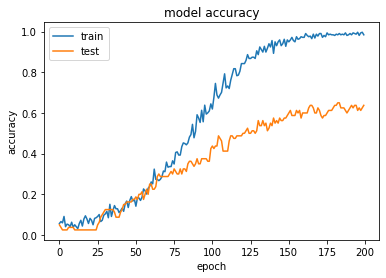

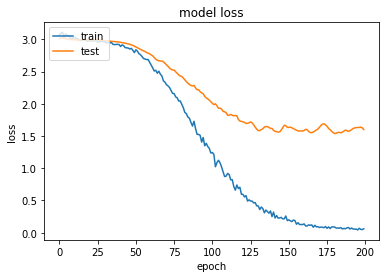

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# step 8

Plot Confusion Matrix

accuracy : 
0.69
Confusion matrix, without normalization
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1]]
Confusion matrix, without normalization


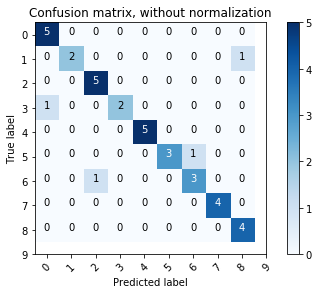

Confusion matrix, without normalization


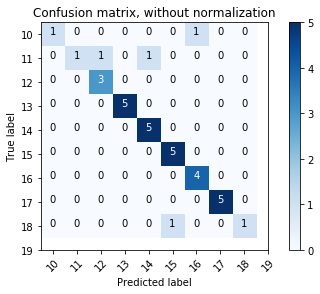

Confusion matrix, without normalization


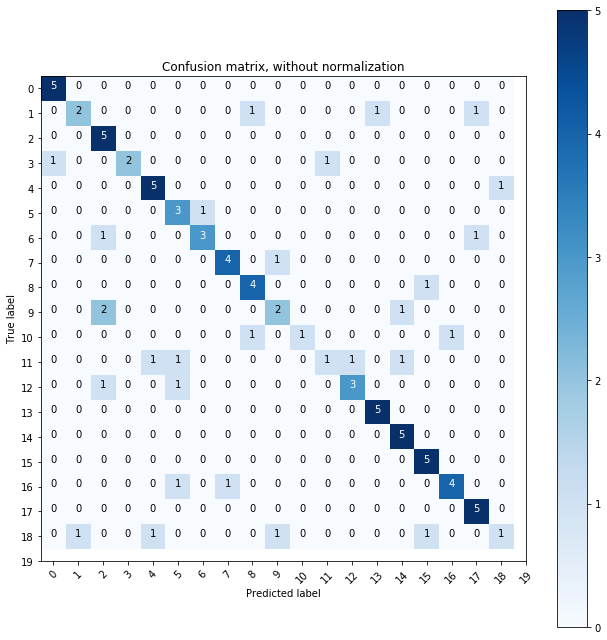

Confusion matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1

In [18]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix[1:20,1:20], classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')
print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))